# Исследовательский анализ данных заведений общественного питания Москвы

- Автор: Шагитова Камила
- Дата: 18.02.2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ данных заведений общественного питания Москвы.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Данные состоят из двух датасетов:
- `rest_info.csv` содержит информацию о заведениях общественного питания;
- `rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания.

#### Описание датасета `rest_info.csv`
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  * 0 — заведение не является сетевым;
  * 1 — заведение является сетевым.
- seats — количество посадочных мест.

#### Описание датасета `rest_price.csv`
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  * «Средний счёт: 1000–1500 ₽»;
  * «Цена чашки капучино: 130–220 ₽»;
  * «Цена бокала пива: 400–600 ₽» и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»: .
  * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число
  * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  * 
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.




### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.
---

## 1. Загрузка данных и знакомство с ними


In [2]:
# Импортируем библиотеки
import pandas as pd

# Библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотека для расчета коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные rest_df и price_df
rest_df = pd.read_csv('datasets/rest_info.csv')
price_df = pd.read_csv('datasets/rest_price.csv')

In [4]:
# Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
# Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.
После первичного анализа можно сделать следующие выводы:
- 6 столбцов содержат строковую информацию и представлены типом данных object. Столбцы `category` и `district` следует преобразовать в тип `category`.  В столбцах `rating` и`chain` типы данных можно оптимизировать с понижением размерности.
- Пропуски в данных содержатся в столбцах `hours` и `seats`. Это потребует либо заполнения, либо удаления строк в зависимости от дальнейшего анализа.
- Значения в столбцах соответствуют описанию.

Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.
По аналогии с предыдущим датасетом можно отметить, что:
- Типы данных в датасете представлены корректно. Типы данных столбцов `middle_avg_bill` и `middle_coffee_cup` можно оптимизировать с понижением размерности.
- Пропуски в данных содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`. Это потребует либо заполнения, либо удаления строк в зависимости от дальнейшего анализа.
- Значения в столбцах соответствуют описанию.

### Подготовка единого датафрейма


In [8]:
# чтобы не потерять данные из датасета rest_info.csv, используем левое присоединение
df = rest_df.merge(price_df, how = 'left', on = 'id')

df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


## 2. Предобработка данных



Так как в столбце `seats` есть пропущенные значения, то мы не можем поменять тип данных, поэтому понизим размерность. Типы данных столбцов `rating`, `middle_avg_bill`, `middle_coffee_cup`, `chain` также следует оптимизировать.
Столбцы `category` и `district` приведем к типу данных category.

In [10]:
# понижаем размерность
for column in ['chain']:
    df[column] = pd.to_numeric(df[column], downcast='integer')

# Оптимизируем тип данных число с плавающей точкой в датафрейме
for column in ['rating', 'middle_avg_bill', 'middle_coffee_cup', 'seats']:
    df[column] = pd.to_numeric(df[column], downcast = 'float')

In [11]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [12]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [13]:
# Преобразуем тип данных столбца category и district в category
df['category'] = df['category'].astype('category')
df['district'] = df['district'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   category
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float32 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   float32 
 9   price              3315 non-null   object  
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float32 
 12  middle_coffee_cup  535 non-null    float32 
dtypes: category(2), float32(4), int8(1), object(6)
memory usage: 550.8+ KB


In [15]:
# Считаем пропуски в данных
df.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [16]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / len(df)).sort_values(ascending = False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

В данных наблюдаются пропущенные значения в след. столбцах:

- `hours`: отсутствуют данные в 536 строках (6.38% данных). 
- `seats`: отсутствуют данные в 3611 строках (42.96% данных). 
- `price`: пропуски обнаружены в 5091 строке (60.56% данных). 
- `avg_bill`: пропуски обнаружены в 4590 строках (54.6% данных). 
- `middle_avg_bill`: отсутствуют данные в 5257 строках (62.54% данных)
- `middle_coffee_cup`: пропуски обнаружены в 7871 строке (93.64% данных).

Пропуски в этих столбцах могут быть связаны с тем, что заведения или пользователи сервисов Яндекса не указали сведения на момент сбора информации.

Во всех столбцах количество пропусков достаточно большое, чтобы их просто удалить. Так как замена пропусков может повлиять на дальнейший анализ, то оставим их как есть.

In [17]:
# Проверяем наличие явных дубликатов
df.duplicated().sum()

0

Полных явных дубликатов в датафрейме нет. Тогда проверим неявные дубликаты по столбцам name и address:

In [18]:
# Приводим к нижнему регистру столбцы name и address
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [19]:
# Считаем кол-во неявных дубликатов по столбцам name и address
df.duplicated(subset = ['name', 'address']).sum()

4

Дубликаты обнаружены и их нужно удалить:

In [20]:
# Удаляем дубликаты
df = df.drop_duplicates(subset = ['name', 'address'])
df.shape[0]

8402

- Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
# Напишем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def around_the_clock(row):
    '''
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце.
    '''
    hours = str(row['hours']).lower()  
    if 'ежедневно' in hours and  'круглосуточно' in hours:
        return True
    return False

In [22]:
# Применяем функцию к датафрейму
df['is_24_7'] = df.apply(around_the_clock, axis = 1)

In [23]:
# Проверяем правильность выполнения функции
df[df['is_24_7']==True].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
10,ac32978af97641bfacf996e7f5a50ee5,great room bar,"бар,паб","москва, левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",4.5,0,102.0,средние,Цена бокала пива:250–350 ₽,NaN,NaN,True
17,b55465d0869648a295ad1d85ed9b5c4f,чайхана беш-бармак,ресторан,"москва, ленинградское шоссе, 71б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",4.4,0,96.0,средние,Средний счёт:350–500 ₽,425.0,NaN,True
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"москва, ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN,True
24,0f5d22f5377340d0a81a9328e6ebdcac,drive café,кафе,"москва, улица дыбенко, 9ас1",Северный административный округ,"ежедневно, круглосуточно",4.0,1,NaN,NaN,NaN,NaN,NaN,True
49,a8bbd74669074068ab44bc567022ee27,2u-ту-ю,пиццерия,"москва, ижорская улица, 8а",Северный административный округ,"ежедневно, круглосуточно",2.7,0,NaN,NaN,Средний счёт:900 ₽,900.0,NaN,True


---

### Промежуточный вывод


**В ходе предобработки данных:** 
1. Оптимизирована размерность типов данных столбцов `rating`, `middle_avg_bill`, `middle_coffee_cup`, `chain`, `seats`
2. Пропуски в столбцах было решено оставить
3. Удалены неявные дубликаты
4. Добавлен столбец `is_24_7` с бинарным признаком с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7

## 3. Исследовательский анализ данных


---

#### Изучаем распределение количества заведений по категориям

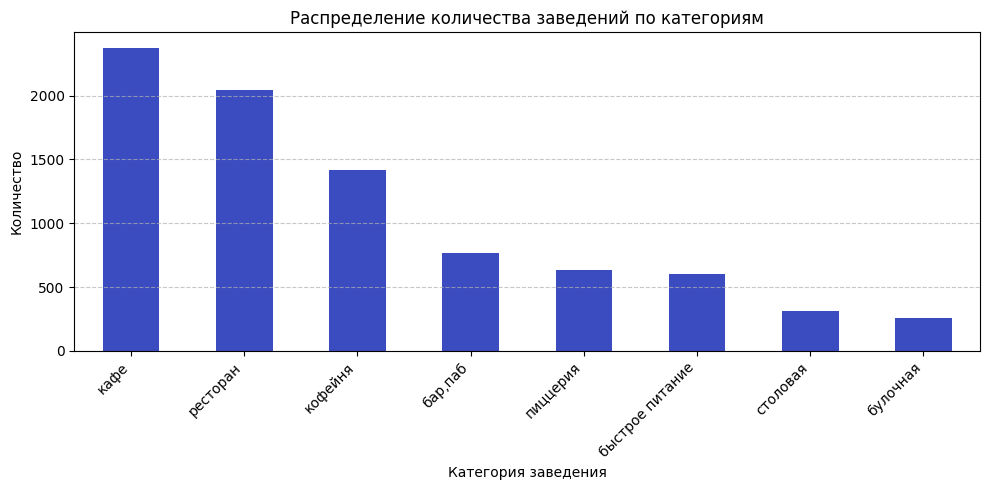

In [24]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму
df['category'].value_counts().plot(
                kind = 'bar',
                rot = 45,  # Увеличиваем угол поворота подписей для лучшей читаемости
                color = '#3B4CC0'
)

# Добавляем название и подписи осей
plt.title('Распределение количества заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество')
plt.xticks(ha='right') # Выравниваем подписи категорий вправо, чтобы не накладывались
plt.tight_layout() # Автоматически подгоняем размеры графика
# Настраиваем сетку
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
# Выводим график
plt.show()                

В данных представлено 8 категорий. Наибольшее количество объектов представлено в категориях "кафе" и "ресторан", наименьшее - в категориях "столовая" и "булочная", что может свидетельствовать о меньшей востребованности таких форматов.

---

#### Исследуем распределение количества заведений по административным районам Москвы

In [25]:
# Исследуем какие административные районы Москвы присутствуют в данных
df['district'].value_counts()

district
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: count, dtype: int64

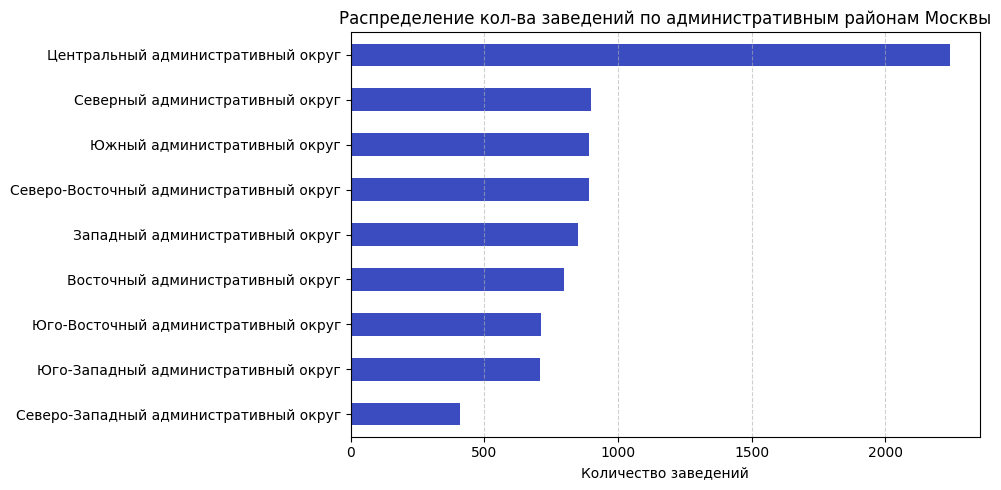

In [26]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим линейчатую диаграмму
df['district'].value_counts().sort_values().plot(
                kind = 'barh',
                color = '#3B4CC0'
)

# Добавляем название и подписи осей
plt.title('Распределение кол-ва заведений по административным районам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('')
plt.tight_layout()
# Настройки сетки
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
# Выводим график
plt.show()

На графике представлено распределение заведений общественного питания по административным округам Москвы. Лидером по количеству заведений является **Центральный административный округ** (более 2000), что ожидаемо, так как это туристический, деловой и культурный центр города. 

В остальных округах количество заведений заметно ниже, но распределение относительно равномерное, за исключением Северо-Западного округа, где заведений меньше всего (менее 500).

In [27]:
# Считаем кол-во заведений каждой категории в Центр. адм. округе
df_cao = df[df['district'] == 'Центральный административный округ']['category'].value_counts()
df_cao

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

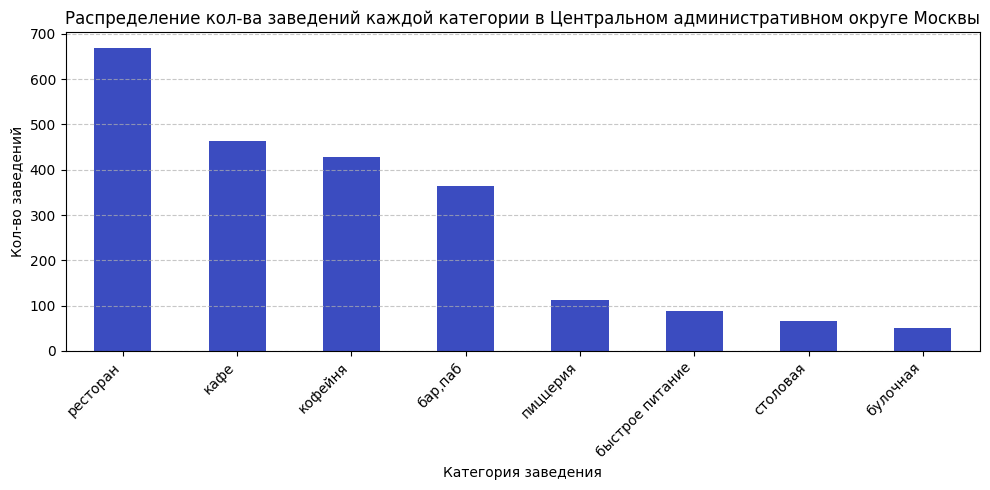

In [28]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму
df_cao.plot(kind = 'bar', 
            rot = 45, # угол поворота меток
            color = '#3B4CC0'
           )
# Добавляем название и подписи осей
plt.title('Распределение кол-ва заведений каждой категории в Центральном административном округе Москвы')
plt.xlabel('Категория заведения')
plt.ylabel('Кол-во заведений')
plt.xticks(ha='right') # Выравниваем подписи категорий вправо, чтобы не накладывались
plt.tight_layout() # Автоматически подгоняем размеры графика
# Сетка
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
# Выводим график
plt.show()

В Центральном административном округе Москвы наибольшее количество заведений представлено в категории "ресторан" - более 600 заведений. "Кафе", "кофейни", "бары, пабы" встречаются реже, но всё же имеют заметное присутствие. Наименьшее количество заведений представлено в категориях "быстрое питание", "столовая" и "булочная" - меньше 100 заведений в каждой из категорий.

---

#### Исследуем соотношение сетевых и несетевых заведений 

In [29]:
# Изучим соотношение сетевых и несетевых заведений в целом
df['chain'].value_counts()

chain
0    5199
1    3203
Name: count, dtype: int64

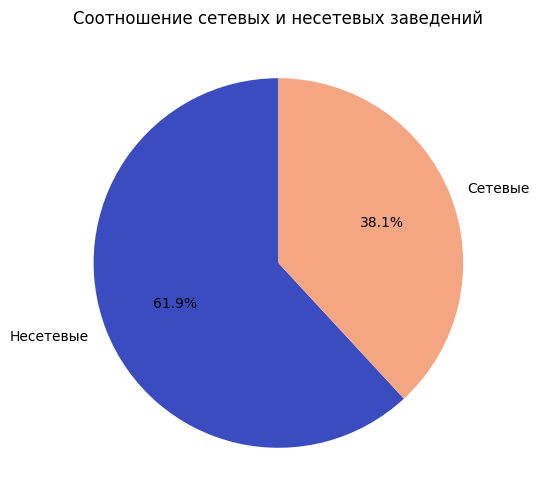

In [30]:
# Строим круговую диаграмму
df['chain'].value_counts().plot(kind = 'pie',
                                figsize=(6, 6), # задаём размер графика
                                autopct='%1.1f%%', # отображение процента каждого сегмента
                                startangle=90,    #  Начальная точка для первого сегмента
                                colors=['#3B4CC0', '#F4A582'],
                                labels=['Несетевые', 'Сетевые'] # меняем название меток
)

# Добавляем название
plt.title('Соотношение сетевых и несетевых заведений')
plt.ylabel('')

# Выводим график
plt.show()

In [31]:
# Считаем соотношение сетевых и несетевых заведений по каждой категории
category_chain_counts = df.groupby('category', observed=False)['chain'].value_counts(normalize=True).unstack()
category_chain_counts.sort_values(by = [0, 1])

chain,0,1
category,,
булочная,0.386719,0.613281
пиццерия,0.478673,0.521327
кофейня,0.490446,0.509554
быстрое питание,0.615257,0.384743
ресторан,0.642997,0.357003
кафе,0.672138,0.327862
столовая,0.720635,0.279365
"бар,паб",0.780105,0.219895


<Figure size 1200x600 with 0 Axes>

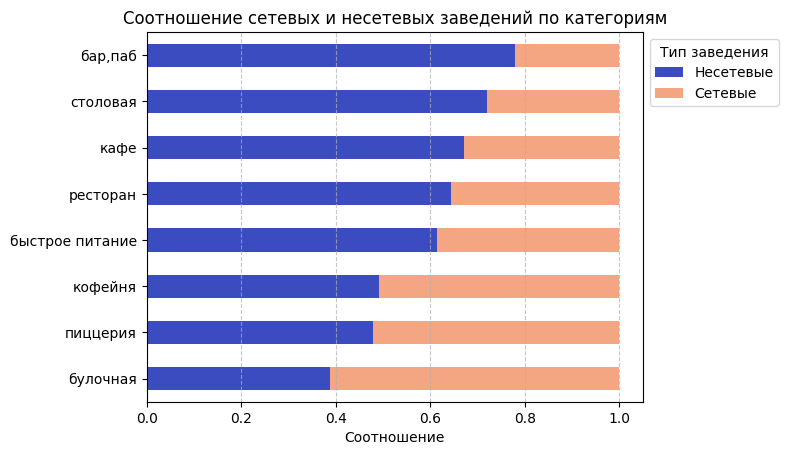

In [32]:
# Задаём размер
plt.figure(figsize=(12, 6))

#Строим линейчатую диаграмму
category_chain_counts.sort_values(by = [0, 1]).plot(
    kind = 'barh',
    stacked = True, # добавляем накопление
    color=['#3B4CC0', '#F4A582']
)

# Добавляем подписи
plt.ylabel('')
plt.xlabel('Соотношение')
plt.title('Соотношение сетевых и несетевых заведений по категориям')

# Сетка
plt.grid(axis='x', linestyle='--', alpha=0.7)
#Добавляем легенду
plt.legend(title='Тип заведения', labels=['Несетевые', 'Сетевые'], bbox_to_anchor=(1, 1))
# Выводим график       
plt.show()

Судя по диаграммам - большую часть составляют несетевые заведения - 61.9%.
* Бары, столовые, кафе, рестораны и заведения быстрого питания в большинстве случаев остаются несетевыми. Возможно это связано с тем, что в этих категориях больше авторских концепций, локальных заведений и уникальных форматов.
* Кофейни и пиццерии имеют примерно одинаковое количество сетевых и несетевых заведений.
* Булочные чаще являются сетевыми - более 60% заведений в этих категориях принадлежат сетям.

---

#### Исследуем количество посадочных мест в заведениях

In [33]:
# Изучаем статистические показатели столбца seats
df['seats'].dropna().describe()

count    4792.000000
mean      108.361435
std       122.841225
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

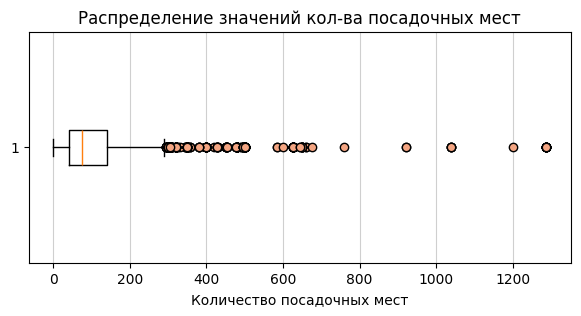

In [34]:

# Задаём размер
plt.figure(figsize = (7,3))

#Строим ящичную диаграмму
plt.boxplot(df['seats'].dropna(), # Убираем пропущенные значения
            vert = False, # Устанавливаем горизонтальную ориентацию
            flierprops=dict(markerfacecolor='#F4A582', marker='o')) # Настраиваем вид выбросов

# Добавляем заголовок и метки оси
plt.title('Распределение значений кол-ва посадочных мест')
plt.xlabel('Количество посадочных мест')

#Добавляем сетку
plt.grid(axis = 'x', alpha = 0.6)

plt.show()

Распределения значений посадочных мест асимметричное, скошенное вправо. Минимальное значение - 0, максимальное - 1288. Большая часть заведений имеет менее 200 посадочных мест, но присутствуют точки с гораздо большими значениями (600, 800, 1000 и даже 1200 мест).
Среднее значение соответствует 108 местам, тогда как медиана — 75. 

Выбросы могут быть связаны с крупными ресторанами, фуд-кортами или столовыми в бизнес-центрах и торговых центрах.

In [35]:
df.groupby('category')['seats'].describe().sort_values(by = '50%', ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_312\513891310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['seats'].describe().sort_values(by = '50%', ascending = False)


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ресторан,1269.0,121.892044,123.792152,0.0,48.0,86.0,150.0,1288.0
"бар,паб",467.0,124.477516,145.162201,0.0,48.0,82.0,148.5,1288.0
кофейня,751.0,111.199730,127.837677,0.0,40.0,80.0,144.0,1288.0
столовая,164.0,99.750000,122.951332,0.0,40.0,75.5,117.0,1200.0
быстрое питание,349.0,98.891121,106.611755,0.0,28.0,65.0,140.0,1040.0
кафе,1217.0,97.365654,117.922432,0.0,35.0,60.0,120.0,1288.0
пиццерия,427.0,94.496490,112.282730,0.0,30.0,55.0,120.0,1288.0
булочная,148.0,89.385132,97.685867,0.0,25.0,50.0,120.0,625.0


C:\Users\User\AppData\Local\Temp\ipykernel_312\2501804598.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_order = df.groupby('category')['seats'].median().sort_values().index
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


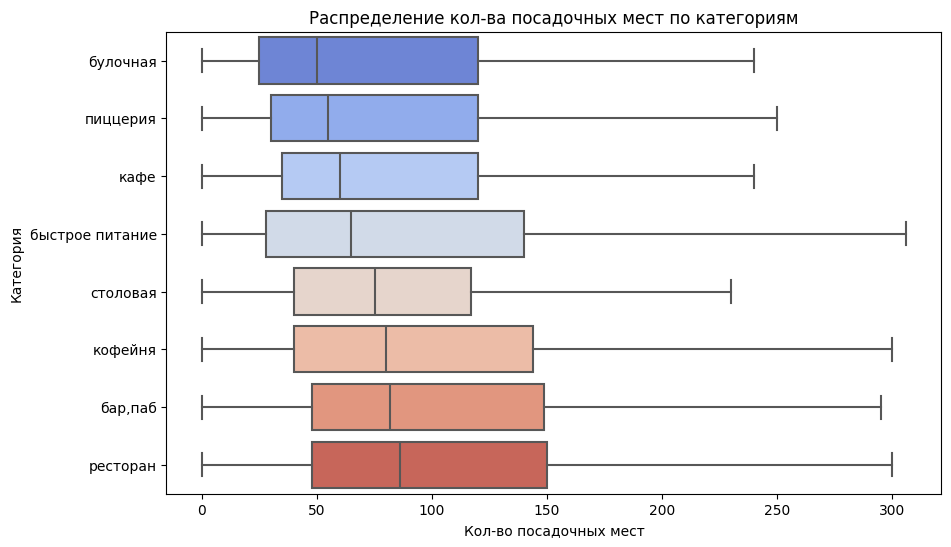

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (10, 6))

# Считаем медиану по количеству посадочных мест для каждой категории
category_order = df.groupby('category')['seats'].median().sort_values().index

#Строим ящичную диаграмму
sns.boxplot(data = df, 
            y = 'category', 
            x = 'seats',
            showfliers=False,  # Скрываем выбросы
            palette = 'coolwarm',
            order = category_order # Сортируем график по медиане
)
# Добавляем заголовок и метки оси
plt.title('Распределение кол-ва посадочных мест по категориям')
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Категория')

plt.show()

Распределения у всех категорий скошенны вправо. Наименьшую медиану кол-ва посадочных мест имеет булочная (50 мест), а наибольшую - ресторан (86 мест), чуть меньше у "бара" и "кафе" - 82 и 80 мест соответственно. При этом наибольший межквартильный размах имеет категория "быстрое питание" (28-140 мест).

---

#### Исследуем рейтинг заведений

In [37]:
# Изучаем статистические показатели рейтинга в разрезе категорий
df.groupby('category')['rating'].describe().sort_values(by = '50%', ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_312\1525228831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('category')['rating'].describe().sort_values(by = '50%', ascending = False)


,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
кофейня,1413.0,4.277282,0.372251,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413142,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124284,0.566003,1.0,4.0,4.2,4.4,5.0


C:\Users\User\AppData\Local\Temp\ipykernel_312\1872611729.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_order = df.groupby('category')['rating'].median().sort_values().index
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


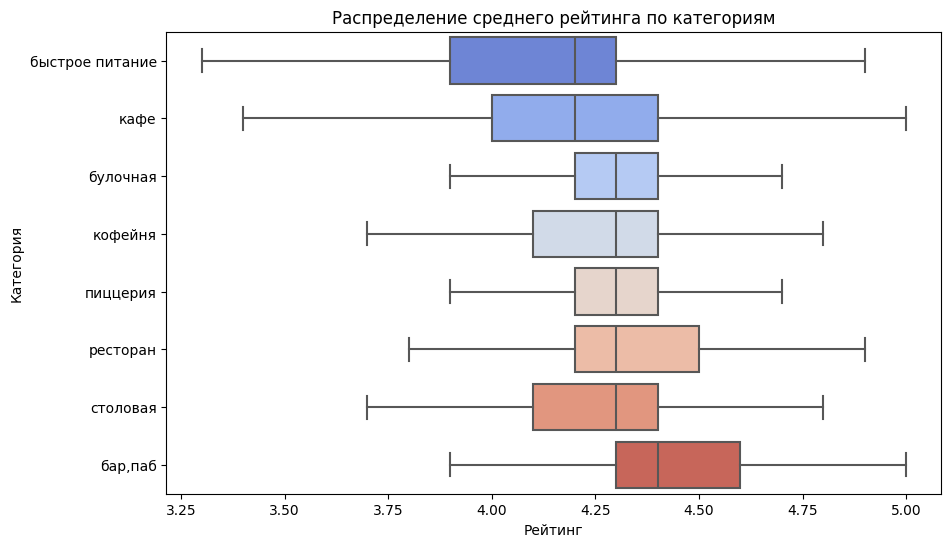

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize = (10, 6))

# Считаем медиану
category_order = df.groupby('category')['rating'].median().sort_values().index

#Строим ящичную диаграмму
sns.boxplot(data = df, 
            y = 'category', 
            x = 'rating',
            showfliers=False,  # Скрываем выбросы
            palette = 'coolwarm',
            order = category_order # Сортируем график
)
# Добавляем заголовок и метки оси
plt.title('Распределение среднего рейтинга по категориям')
plt.xlabel('Рейтинг')
plt.ylabel('Категория')

plt.show()

На графике видна небольшая разница в усреднённых рейтингах для разных типов общепита, самый высокий рейтинг имеют бары, пабы (4.4), самый низкий - заведения быстрого питания и кафе (4.2). 
Остальные категории заведений имеют медианный рейтинг, равный 4.3.

---

#### Изучаем, с какими данными показывают самую сильную корреляцию рейтинги заведений

Для этого нам нужно построить матрицу корреляции Phik – она подходит для данных, где есть как числовые, так и категориальные переменные.

In [39]:
# Вычисляем корреляционную матрицу с использованием phi_k для столбца rating
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating' ]].phik_matrix()
correlation_matrix = correlation_matrix[correlation_matrix.index != 'rating'][['rating']].sort_values(by = 'rating', ascending = False)
correlation_matrix

interval columns not set, guessing: ['chain', 'seats', 'rating']


,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


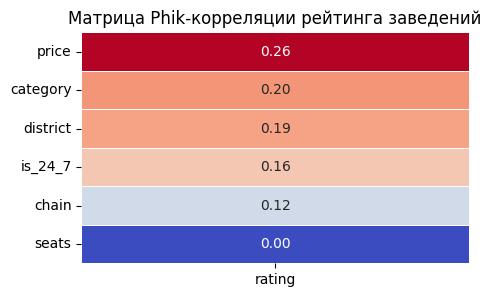

In [40]:
# Строим тепловую карту
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, 
            annot=True,        # Отображаем численные значения в ячейках карты
            cmap='coolwarm', 
            fmt='.2f',         # Форматируем значения корреляции: два знака после точки
            linewidths=0.5,    # Форматируем линию между ячейками карты
            cbar=False         # Отключаем цветовую шкалу
)

# Добавляем заголовок
plt.title('Матрица Phik-корреляции рейтинга заведений')

plt.show()

* Ни один столбец не имеет сильно-выраженной связи с рейтингом заведения.
* Наиболее сильная корреляция рейтинга заведений наблюдается с ценовой категорией (0.26) и категорией заведения (0.20). Это говорит о том, что ценовая категория заведения оказывает влияние на его рейтинг, а также, что некоторые типы заведений стабильно получают более высокие или низкие оценки. Это может быть полезно для владельцев заведений, которые хотят улучшить свои оценки, сосредоточившись на этих аспектах.

---

### Находим топ-15 популярных сетей в Москве, изучаем их рейтинг и категории заведения

In [41]:
# Оставляем только сетевые заведения, группируем по кол-ву заведений  и рейтингу, сортируем по кол-ву заведений и сбрасываем индекс
popular_places = df[df['chain'] == 1].groupby('name').agg({'id': 'count', 
                                                           'rating':'mean',
                                                           'category': 'first'}).sort_values(by = 'id', 
                                                                                             ascending = False).reset_index().head(15)
popular_places

,name,id,rating,category
0,шоколадница,120,4.177500,кофейня
1,домино'с пицца,76,4.169737,пиццерия
2,додо пицца,74,4.286487,пиццерия
3,one price coffee,71,4.064789,кофейня
4,яндекс лавка,69,3.872464,ресторан
5,cofix,65,4.075385,кофейня
6,prime,50,4.116000,ресторан
7,хинкальная,44,4.322727,быстрое питание
8,кофепорт,42,4.147619,кофейня
9,кулинарная лавка братьев караваевых,39,4.394872,кафе


Создадим 2 графика:
* Столбчатая диаграмма (bar plot) показывает количество заведений в сети.
* Линейный график (line plot) показывает средний рейтинг.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


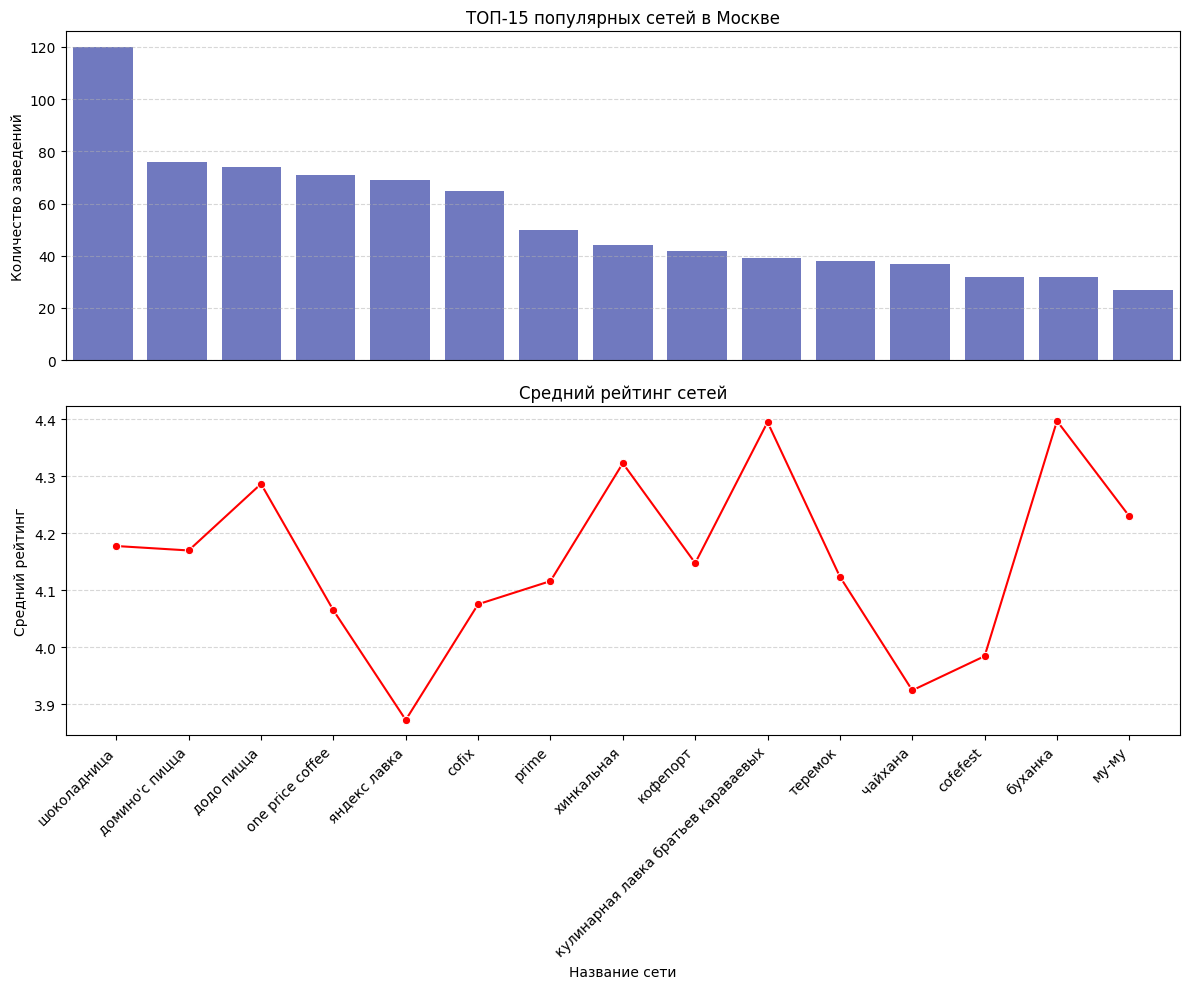

In [42]:
# Создаём фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Столбчатая диаграмма (количество заведений)
sns.barplot(popular_places, 
            x='name', 
            y='id', 
            ax=ax1, 
            color='#3B4CC0', 
            alpha=0.8
)

#Название 1 графика и  оси Y для количества заведений
ax1.set_title('ТОП-15 популярных сетей в Москве')
ax1.set_ylabel('Количество заведений')
    
# Убираем подпись и метки оси X для первого графика
ax1.set_xlabel('')  
ax1.set_xticks([])  

# Линейный график для среднего рейтинга
sns.lineplot(popular_places, 
             x='name', 
             y='rating', 
             ax=ax2, 
             color='red',
             marker = 'o')
# Название оси Y для среднего рейтинга
ax2.set_ylabel('Средний рейтинг')

# Название и метки оси X
ax2.set_xlabel('Название сети')
ax2.set_title('Средний рейтинг сетей')

# Поворот меток на оси X 
plt.xticks(rotation=45, ha='right')

# Включаем сетку на 1 графике
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax2.grid(axis='y', linestyle='--', alpha=0.5)
# Улучшаем компоновку графиков
plt.tight_layout()

# Показываем графики
plt.show()

* Самой популярной сетью в Москве является Шоколадница (120 заведений). Далее идут Доминос пицца (76 заведений) и Додо пицца (74 заведений). 
* Самый высокий средний рейтинг у сетей под названием Кулинарная лавка братьев Караваевых и Буханка - 4.4. Низкий рейтинг - у Яндекс.Лавки (3.87).

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


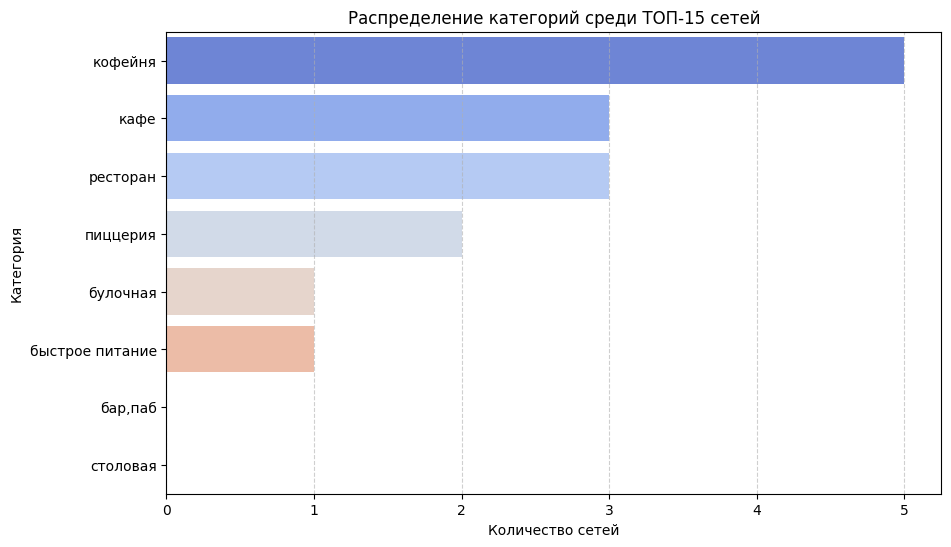

In [43]:
# Задаем размер
plt.figure(figsize=(10, 6))
# Строим линейчатый график
sns.countplot(
    data=popular_places,
    y="category",
    palette="coolwarm",
    order=popular_places['category'].value_counts().index,
)

# Подписи
plt.xlabel("Количество сетей")
plt.ylabel("Категория")
plt.title("Распределение категорий среди ТОП-15 сетей")
# Сетка
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.show()


* Чаще всего популярные сети представлены категорией "кофейня" (5 сетей). 
* Следующими по популярности категориями являются кафе и рестораны, что также подчёркивает востребованность заведений с лёгким питанием и напитками.
* При этом среди баров и столовых нет ни одной сети среди ТОП-15.

---

#### Изучаем вариацию среднего чека заведения в зависимости от района Москвы

In [44]:
# Изучаем медиану среднего чека в разрезе районов Москвы
df.groupby('district')['middle_avg_bill'].median().sort_values(ascending = False)

C:\Users\User\AppData\Local\Temp\ipykernel_312\146487913.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('district')['middle_avg_bill'].median().sort_values(ascending = False)


district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float32

C:\Users\User\AppData\Local\Temp\ipykernel_312\3231618748.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders = df.groupby('district')['middle_avg_bill'].median().sort_values().index
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


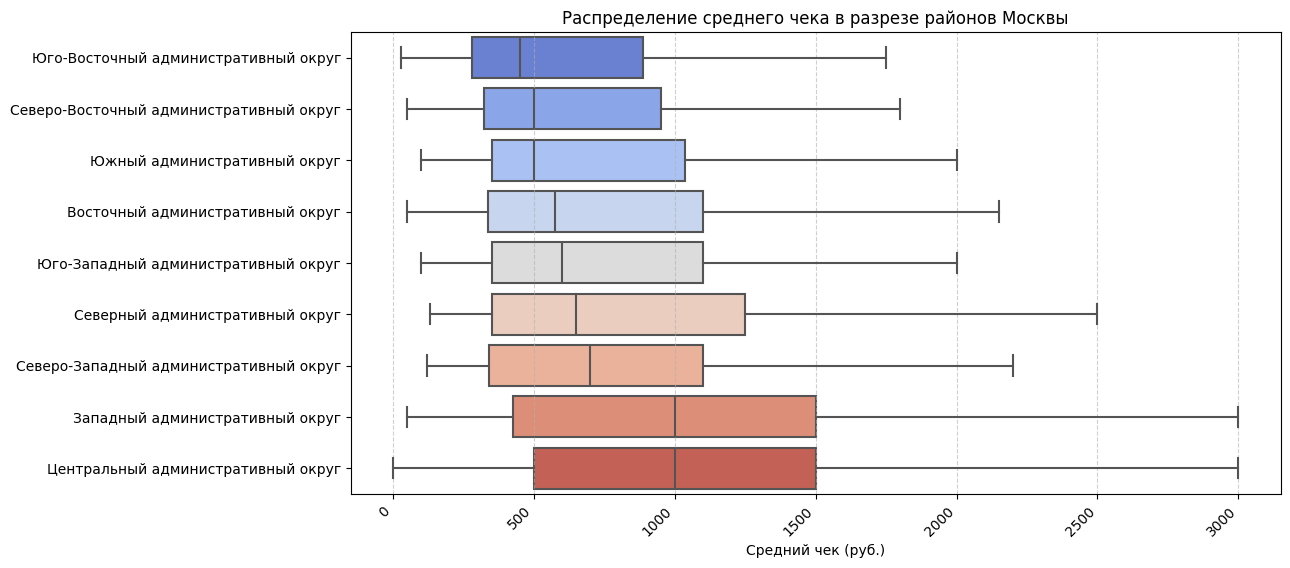

In [45]:
# Задаем размер
plt.figure(figsize=(12, 6))

# Считаем медиану среднего чека по районам Москвы
orders = df.groupby('district')['middle_avg_bill'].median().sort_values().index
# Строим диаграмму размаха
sns.boxplot(df, 
            y = 'district' , 
            x = 'middle_avg_bill', 
            showfliers  = False,
            palette = 'coolwarm',
            order = orders)
# Подписи и названия оси
plt.title('Распределение среднего чека в разрезе районов Москвы')
plt.ylabel('')
plt.xlabel('Средний чек (руб.)')
# Поворот Меток x
plt.xticks(rotation = 45, ha = 'right')
# Сетка
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.show()

* Самый высокий средний чек в заведениях, расположенных в Центральном и Западном адм. округах (1000 рублей). Также эти районы имеют более широкий разброс по сравнению с другими районами, что может говорить о наличии заведений с разными ценовыми сегментами.
* Заведения Юго-Восточного административного округа имеют самый низкий средний чек - 450 рублей.

In [46]:
# Отдельно смотрим на ЦАО и другие округа
central_price = df[df["district"] == "Центральный административный округ"]["middle_avg_bill"].median()
other_price = df[df["district"] != "Центральный административный округ"]["middle_avg_bill"].median()

print(f"Средний чек в ЦАО: {central_price:.2f} руб.")
print(f"Средний чек в других округах: {other_price:.2f} руб.")

Средний чек в ЦАО: 1000.00 руб.
Средний чек в других округах: 600.00 руб.


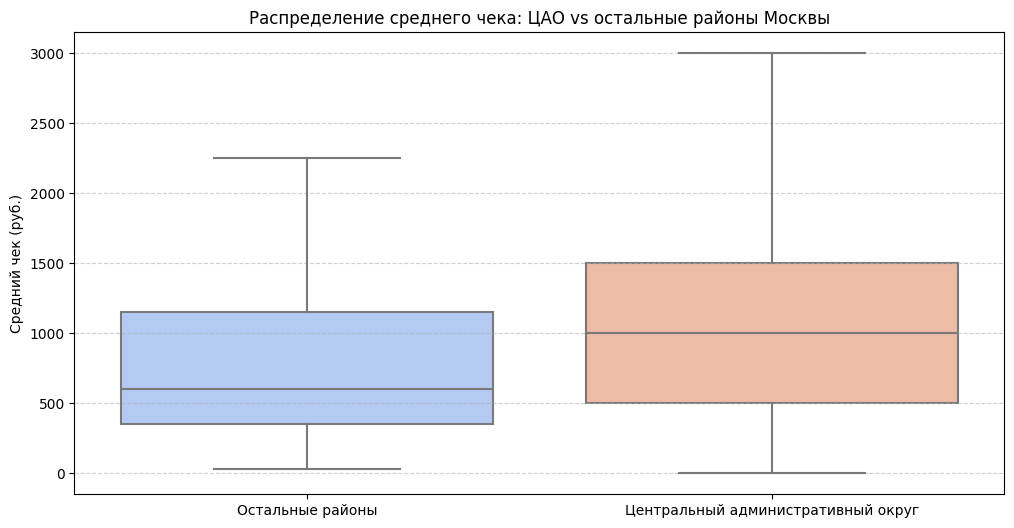

In [47]:

# Задаем размер графика
plt.figure(figsize=(12, 6))

# Разделяем данные на две группы: ЦАО и остальные районы
df['is_cao'] = df['district'] == 'Центральный административный округ'  # Создаем признак для ЦАО

# Строим два боксплота
sns.boxplot(data=df, 
            x='is_cao',  # Группируем по признаку ЦАО/не ЦАО
            y='middle_avg_bill', 
            showfliers=False,  # Исключаем выбросы
            palette='coolwarm') 

# Подписи и названия осей
plt.title('Распределение среднего чека: ЦАО vs остальные районы Москвы')
plt.xlabel('')
plt.ylabel('Средний чек (руб.)')

# Заменяем метки оси X на более понятные
plt.xticks(ticks=[0, 1], labels=['Остальные районы', 'Центральный административный округ'])

# Сетка
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Показываем график
plt.show()

* Заведения Центрального адм. округа имеют более высокий средний чек по сравнению с остальными районами.
* В ЦАО разброс среднего чека (длина ящика и усов) больше, чем в остальных районах. Это может указывать на большее разнообразие заведений: от более дорогих ресторанов до относительно доступных кафе. В остальных районах разброс значений меньше, что говорит о более однородной структуре заведений, возможно, с преобладанием среднего ценового сегмента.

---

#### Изучаем стоимость чашки кофе в зависимости от расположения


C:\Users\User\AppData\Local\Temp\ipykernel_312\1617100079.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('district')['middle_coffee_cup'].mean().sort_values().plot(kind = 'barh', color = '#3B4CC0', grid = False)


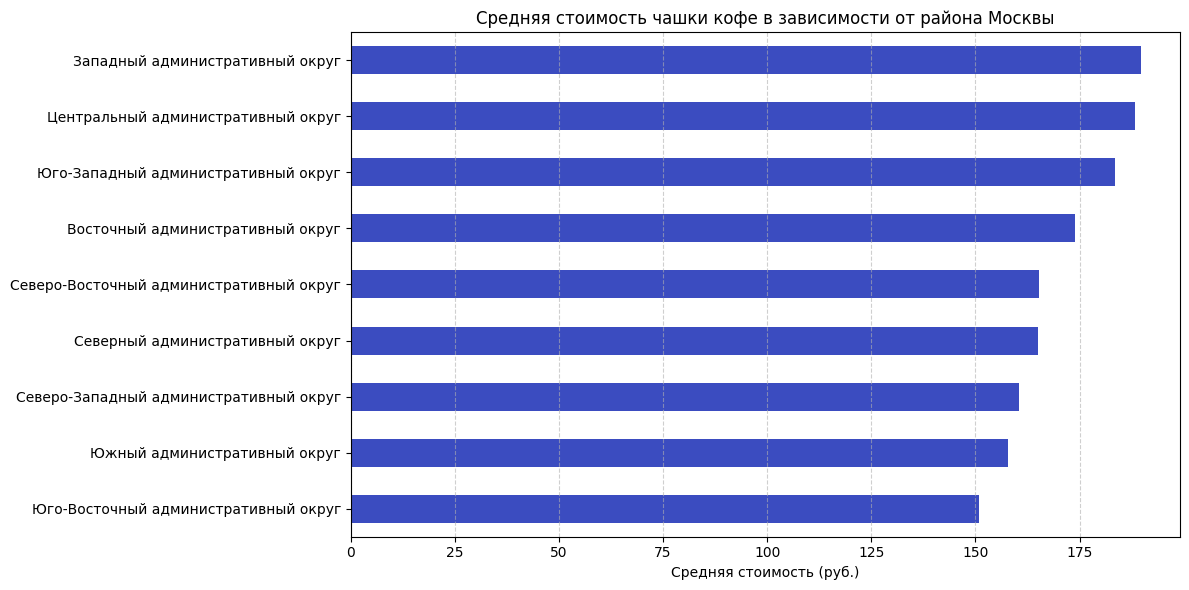

In [48]:
plt.figure(figsize = (12,6))

df.groupby('district')['middle_coffee_cup'].mean().sort_values().plot(kind = 'barh', color = '#3B4CC0', grid = False)
plt.title('Средняя стоимость чашки кофе в зависимости от района Москвы')
plt.ylabel('')
plt.xlabel('Средняя стоимость (руб.)')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

В Западном и Центральном АО в среднем чашка кофе стоит выше, чем в других районах Москвы. Самую дешевую чашку можно купить в заведениях Юго-Восточного АО (150 рублей)

---

#### Находим топ-10 самых часто встречающихся графиков работы заведений


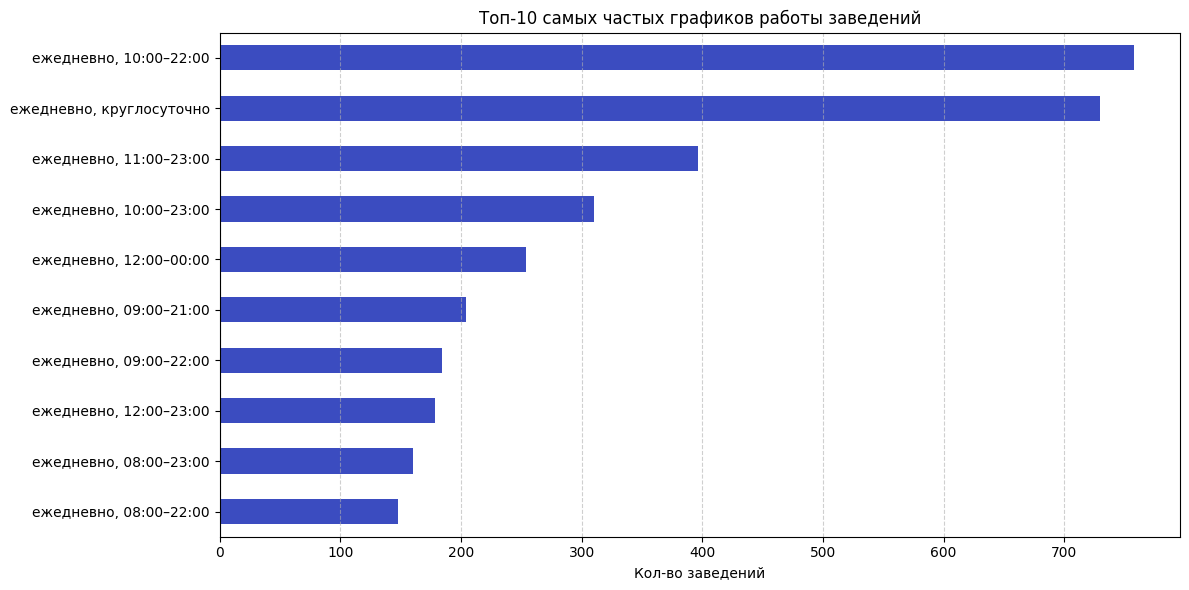

In [49]:
plt.figure(figsize = (12,6))

df['hours'].value_counts().head(10).sort_values().plot(kind = 'barh', color = '#3B4CC0', grid = False)

plt.title('Топ-10 самых частых графиков работы заведений')
plt.ylabel('')
plt.xlabel('Кол-во заведений')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

Чаще всего заведения работают по графику 10:00-22:00 или круглосуточно (более 700 заведений в каждой категории).
Заведений с другими графиками работы уже меньше.

---

### Промежуточный вывод


Исследовательский анализ позволил выявить следующее:
* Наибольшее количество заведений представлено в категориях "кафе" и "ресторан", наименьшее - в категориях "столовая" и "булочная".
* Лидером по количеству заведений является Центральный административный округ (более 2000), наибольшее количество заведений в этом районе представлено в категории "ресторан" - более 600 заведений.
* Большую часть общепита составляют несетевые заведения - 61.9%.
* Заведения в среднем имеют от 40 до 140 посадочных мест.
* Самый высокий рейтинг имеют бары (4.4).
* Самый высокий средний чек в заведениях, расположенных в Центральном и Западном адм. округах (1000 рублей).
* Заведения Юго-Восточного административного округа имеют самый низкий средний чек - 450 рублей.
* Чаще всего заведения работают по графику 10:00-22:00 или круглосуточно (более 700 заведений в каждой категории).

## Общий обзор проделанной работы
В ходе исследования проанализировали данные 8406 заведений Москвы. Данные включали информацию о заведениях общественного питания и  о среднем чеке вних по различным параметрам: административным районам, категориям, сетевому статусу, количеству посадочных мест и популярности сетей. Исследование позволило выявить ключевые тенденции, а также возможные аномалии и выбросы.
## Главные выводы
* Центральный административный округ (ЦАО) лидирует по количеству заведений, значительно опережая другие районы. Это объясняется высокой плотностью населения, туристической привлекательностью и деловой активностью центра Москвы. В наименее насыщенных районах могут существовать перспективные ниши для открытия новых заведений.
* Быстрое питание, булочные, пиццерии и кофейни чаще являются сетевыми, что объясняется стандартизацией формата и высокой рентабельностью таких концепций. В то же время рестораны, бары и столовые чаще работают в несетевом формате.
* Большинство заведений имеют относительно небольшое количество посадочных мест (до 200), но присутствуют выбросы (заведения с более чем 600-1000 местами). 
* Самый высокий рейтинг имеют заведения категории бары (4.4), низкий - заведения быстрого питания и кафе (4.2).
## Рекомендации для заказчика
* В центральных районах высокая конкуренция, но и более высокий средний чек. Открытие заведений здесь требует уникальной концепции.
* В периферийных районах (например, Северо-Западном и Юго-Восточном) наблюдается меньшая насыщенность заведений, что может быть перспективно для открытия заведения.
* Для открытия сети лучше выбирать формат кафе, ресторана или кофеен, так как они чаще работают в сетевом формате и имеют высокий спрос.
* Для уникальных концепций лучше ориентироваться на бары.
* Для новых заведений стоит ориентироваться на диапазон до 200 мест, так как большинство успешных заведений укладываются в эти параметры.
* Чтобы иметь высокий рейтинг на сервисах, стоит обратить внимание на ценовую категорию заведения.
* График работы заведения стоит выбрать 10:00-22:00 или круглосуточно, так как большинство заведений работают в этих режимах..